In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from os import path
from transformers import pipeline
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Prajwal\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prajwal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prajwal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prajwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df = pd.read_csv('ev_user_review_data.csv')
df.head()

,article_no,title,article,news_source,region,article_cleaned,converted_date,year,entities
0,0,Commentary: Driving an EV does not make you p...,['When I started driving an electric vehicle i...,latimes,west-coast,started driving electric vehicle 2018 became p...,09-17-2022,2022,"[('2018', 'DATE'), ('100', 'CARDINAL'), ('2035..."
1,1,Op-Ed: Think bigger. Switching to electric ca...,['It might feel like the easy solution — just ...,latimes,west-coast,might feel like easy solution replace gasguzzl...,09-15-2022,2022,"[('california', 'GPE'), ('last month 2035', 'D..."
2,2,Editorial: EPA wants to speed up EV switch. G...,['The Biden administration just proposed hitti...,latimes,west-coast,biden administration proposed hitting accelera...,04-12-2023,2023,"[('biden administration', 'ORG'), ('wednesday'..."
3,3,"California’s electric car revolution, designe...",['The precious cargo on the ship docked in San...,latimes,west-coast,precious cargo ship docked san diego bay strik...,07-21-2021,2021,"[('san diego bay', 'LOC'), ('thousand mile', '..."
4,4,Electric cars now make up a fifth of Californ...,['One out of every 5 cars sold in California i...,latimes,west-coast,one every 5 car sold california powered batter...,11-01-2023,2023,"[('one', 'CARDINAL'), ('5', 'CARDINAL'), ('cal..."


In [6]:
# creating both polarity and subjectivity columns in the dataframe
p=[]
s=[]
for i in df['article_cleaned']:
  testimonial=TextBlob(i)
  p.append(testimonial.sentiment.polarity)
  s.append(testimonial.sentiment.subjectivity)
df['Polarity']=p
df['Subjectivity']=s

In [7]:
df.head()

,article_no,title,article,news_source,region,article_cleaned,converted_date,year,entities,Polarity,Subjectivity
0,0,Commentary: Driving an EV does not make you p...,['When I started driving an electric vehicle i...,latimes,west-coast,started driving electric vehicle 2018 became p...,09-17-2022,2022,"[('2018', 'DATE'), ('100', 'CARDINAL'), ('2035...",0.102700,0.496450
1,1,Op-Ed: Think bigger. Switching to electric ca...,['It might feel like the easy solution — just ...,latimes,west-coast,might feel like easy solution replace gasguzzl...,09-15-2022,2022,"[('california', 'GPE'), ('last month 2035', 'D...",-0.032144,0.419426
2,2,Editorial: EPA wants to speed up EV switch. G...,['The Biden administration just proposed hitti...,latimes,west-coast,biden administration proposed hitting accelera...,04-12-2023,2023,"[('biden administration', 'ORG'), ('wednesday'...",0.069940,0.435730
3,3,"California’s electric car revolution, designe...",['The precious cargo on the ship docked in San...,latimes,west-coast,precious cargo ship docked san diego bay strik...,07-21-2021,2021,"[('san diego bay', 'LOC'), ('thousand mile', '...",0.076814,0.435647
4,4,Electric cars now make up a fifth of Californ...,['One out of every 5 cars sold in California i...,latimes,west-coast,one every 5 car sold california powered batter...,11-01-2023,2023,"[('one', 'CARDINAL'), ('5', 'CARDINAL'), ('cal...",0.118097,0.284825


In [9]:
#code uses the VADER (Valence Aware Dictionary and sEntiment Reasoner) 
#sentiment analysis tool to analyze the sentiment of a given text
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

def print_sentiment_result(sentiment_label, sentiment_scores):
    print(f"Positivity: {sentiment_scores['pos'] * 100}%")
    print(f"Negativity: {sentiment_scores['neg'] * 100}%")
    print(f"Neutrality: {sentiment_scores['neu'] * 100}%")

In [10]:
Positivity = []
Negativity = []
Neutrality = []
Compound_score = []

for article in df['article_cleaned']:
    sentiment_scores = analyze_sentiment(article)
    Positivity.append(sentiment_scores['pos'] * 100)
    Negativity.append(sentiment_scores['neg'] * 100)
    Neutrality.append(sentiment_scores['neu'] * 100)
    #convert the compound score to a scale from 0 to 100(where 0 represents the most negative sentiment, 100 represents the most positive sentiment)
    Compound_score.append((sentiment_scores['compound']+1)*50)

df['Positivity'] = Positivity
df['Negativity'] = Negativity
df['Neutrality'] = Neutrality
df['Compound_score'] = Compound_score

In [11]:
df['Compound_score']

0     98.875
1     75.790
2     62.670
3     99.680
4     93.290
5     99.610
6     99.840
7     97.795
8     99.315
9      4.595
10    99.680
11    99.825
12    99.555
13    99.745
14    99.655
15    86.110
16    99.210
17    99.935
18    90.615
19    99.855
20    99.825
21    99.915
22    67.445
23    98.405
24    99.920
25    99.775
26    99.640
27    99.965
28    99.930
29    99.790
30    81.245
31    99.495
32    97.110
33    99.685
34    99.420
35    99.715
36    99.460
37    98.410
38    99.880
39    99.300
40    99.605
41    99.120
42    99.795
43    99.880
44    97.625
Name: Compound_score, dtype: float64

In [12]:
df.columns

Index(['article_no', 'title', 'article', 'news_source', 'region',
       'article_cleaned', 'converted_date', 'year', 'entities', 'Polarity',
       'Subjectivity', 'Positivity', 'Negativity', 'Neutrality',
       'Compound_score'],
      dtype='object')

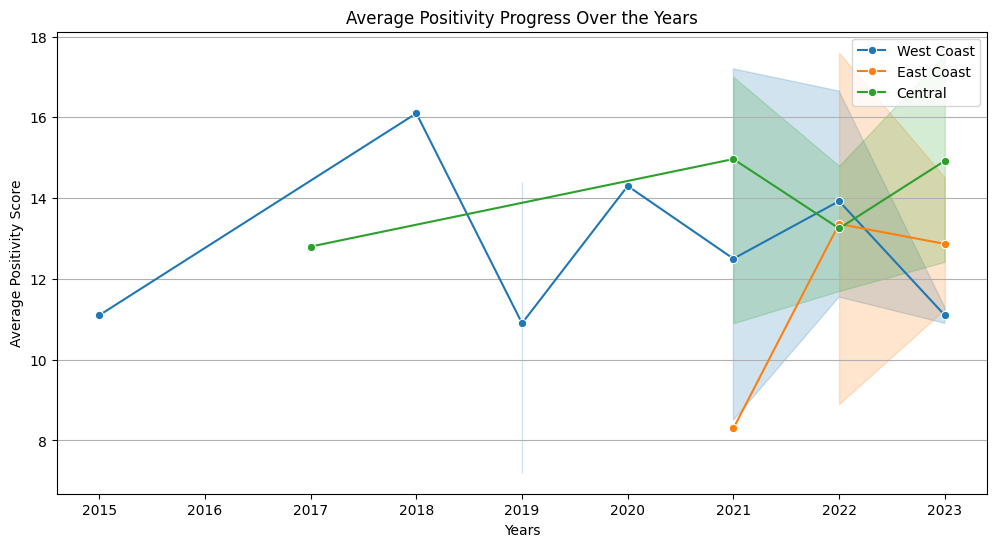

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting data for each region
west_coast_data = df[df['region'] == 'west-coast']
east_coast_data = df[df['region'] == 'east-coast']
central_data = df[df['region'] == 'central']

# Positivity Progress Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Positivity', data=west_coast_data, label='West Coast', marker='o')
sns.lineplot(x='year', y='Positivity', data=east_coast_data, label='East Coast', marker='o')
sns.lineplot(x='year', y='Positivity', data=central_data, label='Central', marker='o')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Average Positivity Score')
plt.title('Average Positivity Progress Over the Years')
plt.legend()
plt.grid(axis='y')
plt.show()

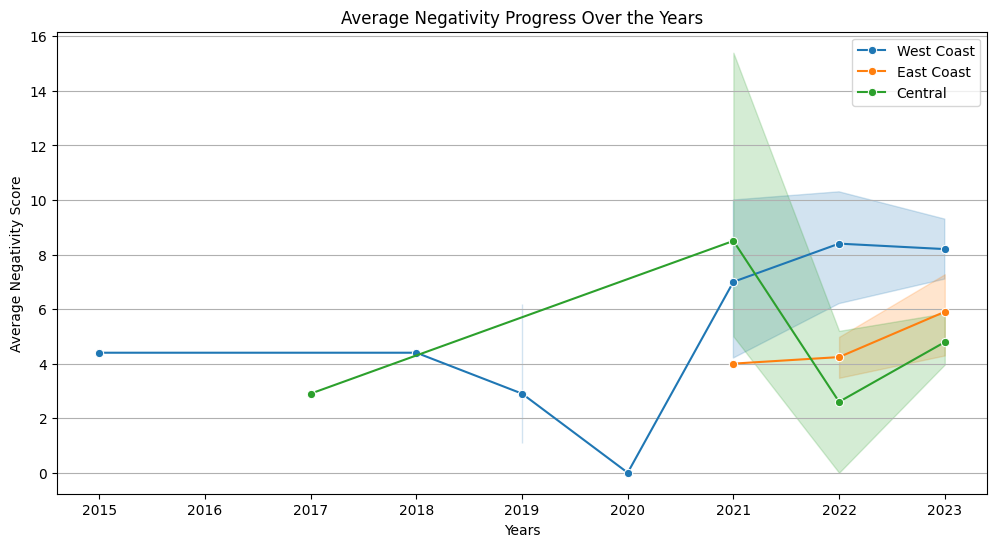

In [14]:
# Negativity Progress Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Negativity', data=west_coast_data, label='West Coast', marker='o')
sns.lineplot(x='year', y='Negativity', data=east_coast_data, label='East Coast', marker='o')
sns.lineplot(x='year', y='Negativity', data=central_data, label='Central', marker='o')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Average Negativity Score')
plt.title('Average Negativity Progress Over the Years')
plt.legend()
plt.grid(axis='y')
plt.show()

In [15]:
import plotly.express as px

def plot_sentiment_analysis_by_region(df, region_name):
    """
    Plots the sentiment analysis (average subjectivity and polarity) over the years for a given region.

    :param df: DataFrame containing the sentiment data.
    :param region_name: The name of the region to filter the data by.
    """
    # Filter data for the chosen region
    region_data = df[df['region'] == region_name]

    # Group by year
    grouped_data = region_data.groupby('year')

    # Calculate average subjectivity and polarity
    average_sentiments = grouped_data[['Subjectivity', 'Polarity']].mean()

    # Create the plot
    fig = px.line(average_sentiments, x=average_sentiments.index, y=average_sentiments.columns,
                  labels={'value': 'Sentiment Score', 'variable': 'Sentiment Type'},
                  title=f'Sentiment Analysis for {region_name} Over the Years',
                  line_shape='linear', render_mode='svg')

    # Update layout
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Average Subjectivity/Polarity Score',
        legend_title='Sentiment Type',
        template='plotly_white'
    )

    # Show the figure
    fig.show()

# Example usage
plot_sentiment_analysis_by_region(df, 'east-coast')

In [16]:
plot_sentiment_analysis_by_region(df, 'west-coast')

In [17]:
plot_sentiment_analysis_by_region(df, 'central')

In [18]:
##Region-wise Sentiment
import plotly.express as px

# Create a box plot for region-wise sentiment(positive)
fig = px.box(df, x='region', y='Positivity', color='region',
             title='Distribution of Positivity Towards EVs Across Regions',
             labels={'Positivity': 'Positivity Score'})

fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Positivity Score',
    legend_title='Region',
    template='plotly_white'
)

fig.show()

In [19]:
import plotly.express as px

# Create a box plot for region-wise sentiment(Negative)
fig = px.box(df, x='region', y='Negativity', color='region',
             title='Distribution of Negativity Towards EVs Across Regions',
             labels={'Negativity': 'Negativity Score'})

fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Negativity Score',
    legend_title='Region',
    template='plotly_white'
)

fig.show()

In [20]:
region_sentiment = df.groupby('region')['Positivity'].sum().reset_index()

In [21]:
print(region_sentiment)

       region  Positivity
0     central       218.5
1  east-coast       190.9
2  west-coast       189.6


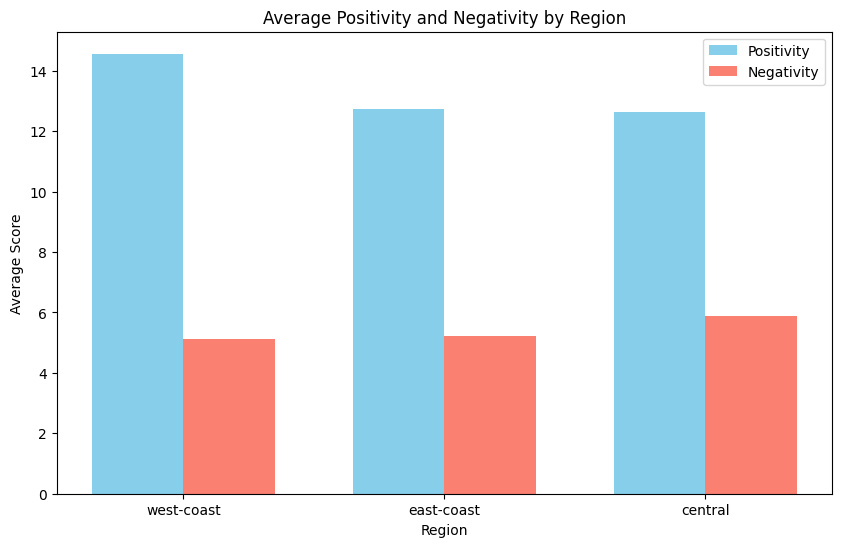

In [22]:
# Average Positivity and Negativity by Region
import matplotlib.pyplot as plt
import numpy as np

regions = df['region'].unique()
avg_positivity = df.groupby('region')['Positivity'].mean()
avg_negativity = df.groupby('region')['Negativity'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(regions))

bar1 = ax.bar(index, avg_positivity, bar_width, label='Positivity', color='skyblue')
bar2 = ax.bar(index + bar_width, avg_negativity, bar_width, label='Negativity', color='salmon')

ax.set_xlabel('Region')
ax.set_ylabel('Average Score')
ax.set_title('Average Positivity and Negativity by Region')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(regions)
ax.legend()

plt.show()

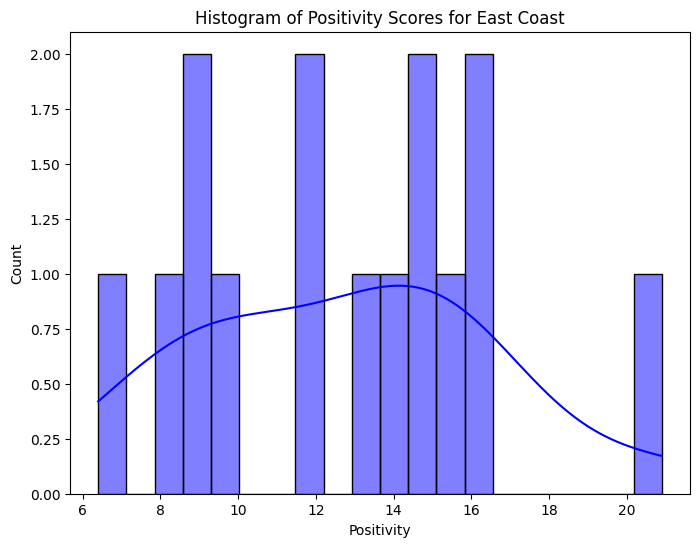

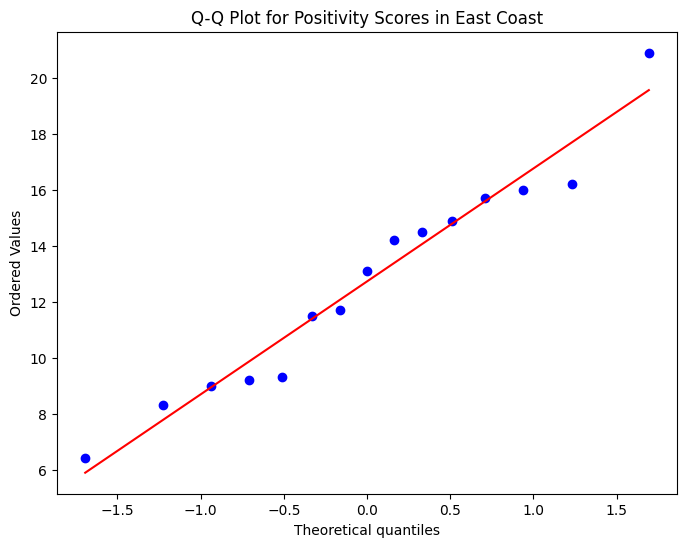

In [23]:
# testing for east coast
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

east_data = df[df['region'] == 'east-coast']['Positivity']
west_data = df[df['region'] == 'west-coast']['Positivity']
central_data = df[df['region'] == 'central']['Positivity']

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(east_data, kde=True, color='blue', bins=20)
plt.title('Histogram of Positivity Scores for East Coast')
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(east_data, dist='norm', plot=plt)
plt.title('Q-Q Plot for Positivity Scores in East Coast')
plt.show()